Except numeric data, we can also find useful insights from string data. Here I will draw the wordcloud based on the overviews of different neighbourhood group of Seattle to highlight each neighbourhood's characteristic.

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

listing=pd.read_csv('listings.csv')

listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


We only need 2 columns: neighbourhood name and overview:

In [2]:
review=listing[['neighbourhood_group_cleansed','neighborhood_overview']]

In [3]:
# drop those rows that don't have neighborhood overview
review=review.dropna(subset=['neighborhood_overview'])

Let's check how many neighborhood groups and how many listings belong to each group:

In [4]:
review['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    617
Capitol Hill           396
Downtown               343
Central Area           276
Queen Anne             213
Ballard                179
West Seattle           150
Rainier Valley         123
University District     89
Beacon Hill             82
Delridge                64
Northgate               58
Cascade                 56
Lake City               47
Magnolia                45
Seward Park             38
Interbay                10
Name: neighbourhood_group_cleansed, dtype: int64

First, we will plot a word cloud for Capitol Hill area

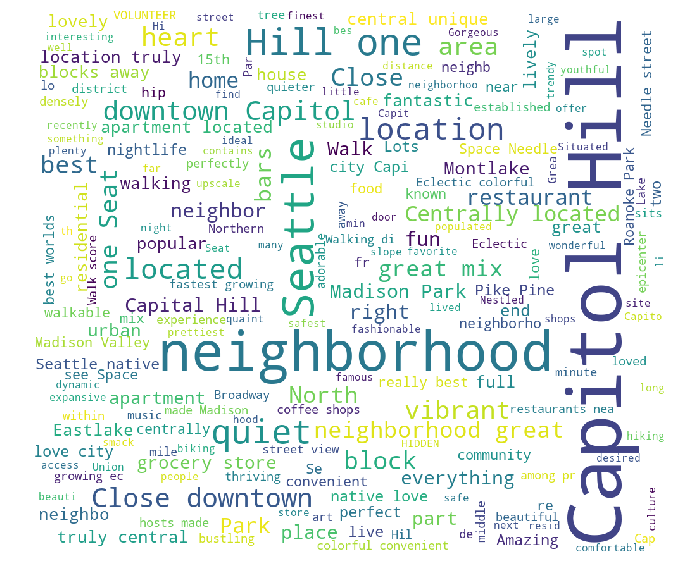

In [5]:
Capitol_Hill=review[review['neighbourhood_group_cleansed']=='Capitol Hill']['neighborhood_overview']
plt.subplots(figsize = (15, 10))
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(Capitol_Hill.to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In this wordcloud, the most frequent words like capitol hill, neighborhood, Seattle don't seem very insightful. Let's remove these 'stop' words then make a new word cloud.

In [31]:
Capitol_Hill2=Capitol_Hill.str.replace('Capitol Hill','')
Capitol_Hill2=Capitol_Hill2.str.replace('Seattle','')
Capitol_Hill2=Capitol_Hill2.str.replace('neighborhood','')
Capitol_Hill2=Capitol_Hill2.str.replace('location','')
Capitol_Hill2=Capitol_Hill2.str.replace('located','')

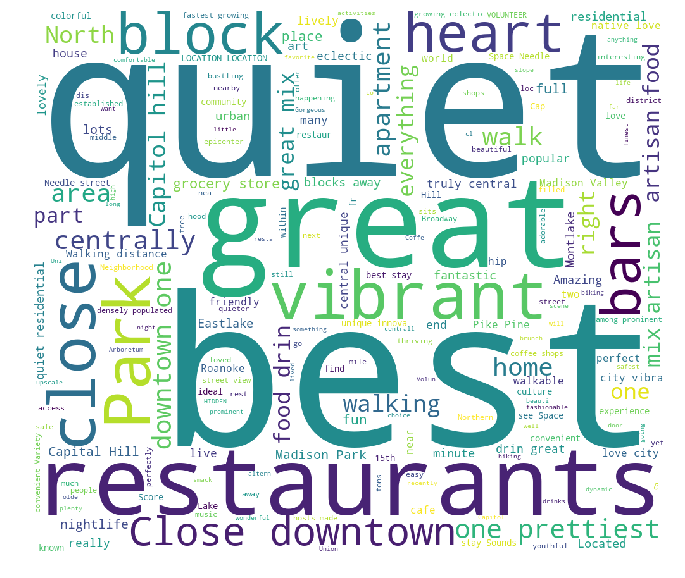

In [32]:
plt.subplots(figsize = (15, 10))
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(Capitol_Hill2.to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Now looks like key words for Capitol hill include quient, vibrant, restaurants and park.

In [33]:
Queen_Anne=review[review['neighbourhood_group_cleansed']=='Queen Anne']['neighborhood_overview']

In [41]:
Queen_Anne2=Queen_Anne.str.replace('Queen Anne','')
Queen_Anne2=Queen_Anne2.str.replace('Seattle','')
Queen_Anne2=Queen_Anne2.str.replace('neighborhood','')
Queen_Anne2=Queen_Anne2.str.replace('location','')
Queen_Anne2=Queen_Anne2.str.replace('located','')


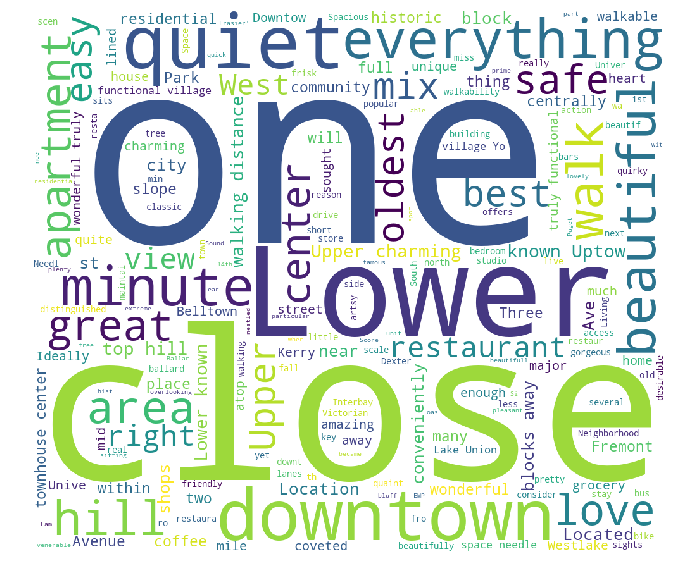

In [42]:
plt.subplots(figsize = (15, 10))
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(Queen_Anne2.to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [51]:
Downtown=review[review['neighbourhood_group_cleansed']=='Downtown']['neighborhood_overview']
Downtown=Downtown.str.lower()
Downtown2=Downtown.str.replace('downtown','')
Downtown2=Downtown2.str.replace('seattle','')
Downtown2=Downtown2.str.replace('neighborhood','')
Downtown2=Downtown2.str.replace('location','')
Downtown2=Downtown2.str.replace('located','')


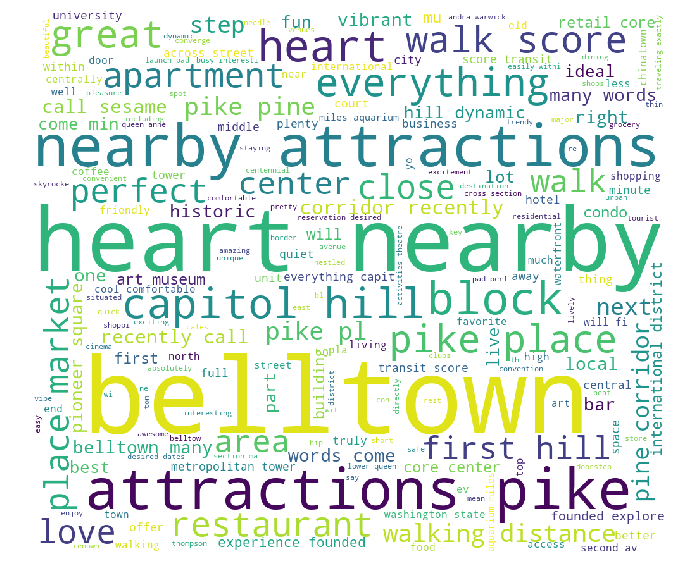

In [53]:
plt.subplots(figsize = (15, 10))
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(Downtown2.to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

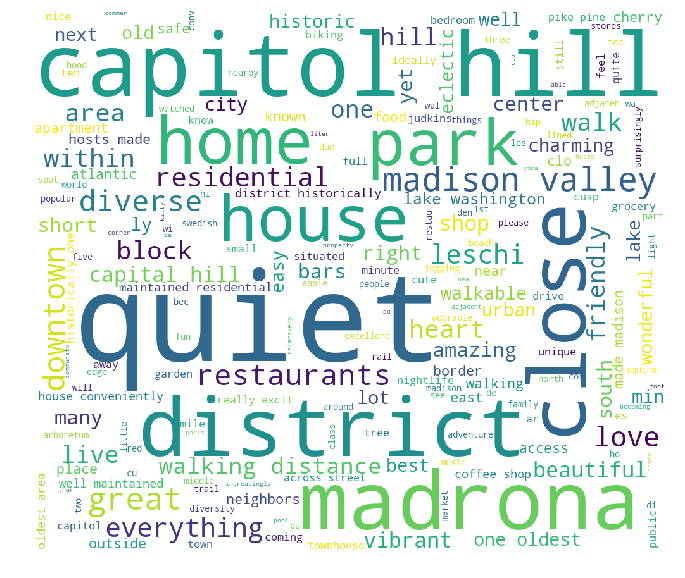

In [57]:
Central_Area=review[review['neighbourhood_group_cleansed']=='Central Area']['neighborhood_overview']
Central_Area2=Central_Area.str.lower()
Central_Area2=Central_Area2.str.replace('central','')
Central_Area2=Central_Area2.str.replace('seattle','')
Central_Area2=Central_Area2.str.replace('neighborhood','')
Central_Area2=Central_Area2.str.replace('location','')
Central_Area2=Central_Area2.str.replace('located','')



plt.subplots(figsize = (15, 10))
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(Central_Area2.to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


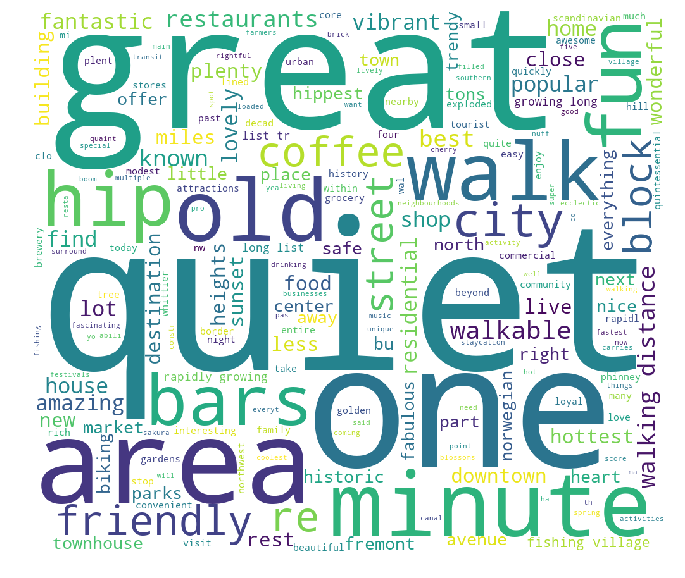

In [58]:
Ballard=review[review['neighbourhood_group_cleansed']=='Ballard']['neighborhood_overview']
Ballard2=Ballard.str.lower()
Ballard2=Ballard2.str.replace('ballard','')
Ballard2=Ballard2.str.replace('seattle','')
Ballard2=Ballard2.str.replace('neighborhood','')
Ballard2=Ballard2.str.replace('location','')
Ballard2=Ballard2.str.replace('located','')



plt.subplots(figsize = (15, 10))
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(Ballard2.to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



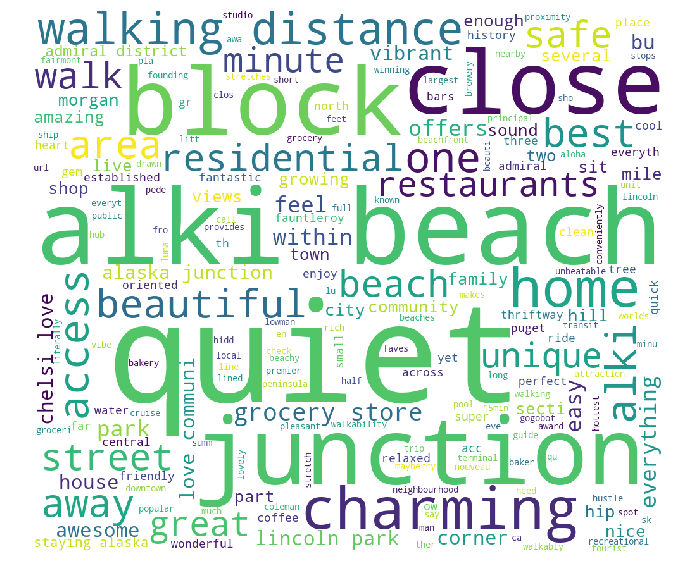

In [60]:
West_Seattle=review[review['neighbourhood_group_cleansed']=='West Seattle']['neighborhood_overview']
West_Seattle2=West_Seattle.str.lower()
West_Seattle2=West_Seattle2.str.replace('west','')
West_Seattle2=West_Seattle2.str.replace('seattle','')
West_Seattle2=West_Seattle2.str.replace('neighborhood','')
West_Seattle2=West_Seattle2.str.replace('location','')
West_Seattle2=West_Seattle2.str.replace('located','')



plt.subplots(figsize = (15, 10))
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(West_Seattle2.to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

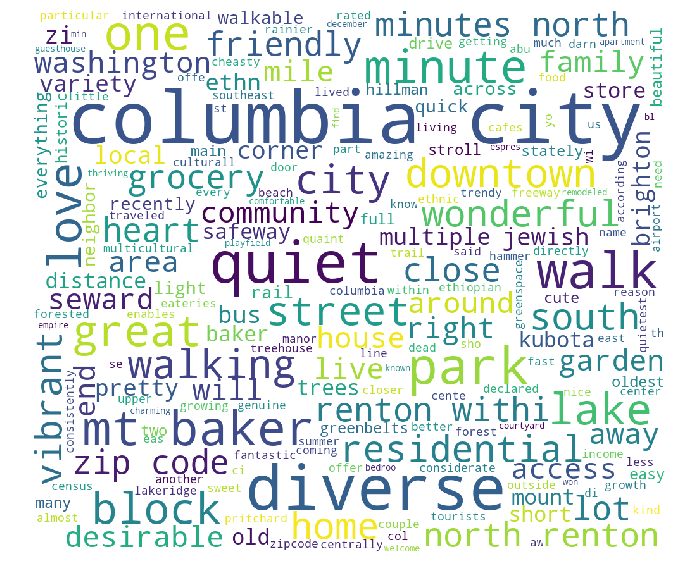

In [61]:
Rainier_Valley=review[review['neighbourhood_group_cleansed']=='Rainier Valley']['neighborhood_overview']
Rainier_Valley2=Rainier_Valley.str.lower()
Rainier_Valley2=Rainier_Valley2.str.replace('rainier valley','')
Rainier_Valley2=Rainier_Valley2.str.replace('seattle','')
Rainier_Valley2=Rainier_Valley2.str.replace('neighborhood','')
Rainier_Valley2=Rainier_Valley2.str.replace('location','')
Rainier_Valley2=Rainier_Valley2.str.replace('located','')



plt.subplots(figsize = (15, 10))
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(Rainier_Valley2.to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()